In [10]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import random
import json

In [12]:
#directory = "/Users/test/Desktop/Audio Vox Datasets and References/TEDLIUM_release1/train/stm"
#directory = "/Volumes/LaCie/WORKING MATERIALS/TEDLIUM/train/stm"
directory = "/Volumes/LaCie/WORKING MATERIALS/podcasts-no-audio-13GB/spotify-podcasts-2020/podcasts-transcripts"
FILE_LIST = []
for root, subdirectories, files in os.walk(directory):
    for file in files:
        file_name = os.path.join(root, file)
        ID = file_name
        FILE_LIST.append(ID)
        
PODCAST_paths = list(set(FILE_LIST))
print(len(PODCAST_paths))

39898


In [14]:
PODCAST_paths[0]

'/Volumes/LaCie/WORKING MATERIALS/podcasts-no-audio-13GB/spotify-podcasts-2020/podcasts-transcripts/2/3/show_23Yv8Hi6fSkoUzVOaiKapn/0XT67y0Y5KbHTchsey9eNJ.json'

In [72]:
with open(PODCAST_paths[1]) as f:
  data = json.load(f)

In [82]:
'''u = 1
print(data['results'][u]['alternatives'][0])
print(not data['results'][u]['alternatives'][0])
'''

"u = 1\nprint(data['results'][u]['alternatives'][0])\nprint(not data['results'][u]['alternatives'][0])\n"

In [83]:
Sentence_Collect_Temp = []
for i in data['results']:
    if i['alternatives'][0]:
        try:
            words = i['alternatives'][0]['transcript']
            #print(words)
            Sentence_Collect_Temp.append(words)
        except KeyError:
            ## KeyError for ['transcript'] key happens occasionaly during parsing.
            pass
    else:
        pass
    
    

In [94]:
Word_List = []
for sent in Sentence_Collect_Temp:
    sentence = sent.split(' ')
    for w in sentence:
        if w: # checks for empty strings with a bool
            Word_List.append(w.lower().strip('.').strip('?').strip(','))
    

In [105]:
len(PODCAST_paths)

39898

In [109]:
Master_Word_List = []

PATHS = PODCAST_paths

for i in range(len(PATHS)):
    pathname = PATHS[i]
    
    ### OPEN JSON FILE AS 'data' VARIABLE
    with open(pathname) as f:
        try:
            data = json.load(f)

            ### COLLECT TRANSCRIBED SENTENCES
            Sentence_Collect_Temp = []
            for i in data['results']:
                if i['alternatives'][0]:
                    try:
                        SENTS = i['alternatives'][0]['transcript']
                        ### Append Sentences
                        Sentence_Collect_Temp.append(SENTS)
                    except KeyError:
                        # KeyError for ['transcript'] key happens occasionaly during parsing.
                        pass
                else:
                    pass

            ### BREAK SENTENCES INTO WORDS - PROCESS, CLEAN, STORE IN LIST
            for sent in Sentence_Collect_Temp:
                sentence = sent.split(' ')
                for w in sentence:
                    if w: # checks for empty strings with a bool
                        Master_Word_List.append(w.lower().strip('.').strip('?').strip(','))
        except UnicodeDecodeError:
            pass

KeyboardInterrupt: 

In [119]:
len(Master_Word_List)
Master_Word_List = [word for word in Master_Word_List if word.isalpha()]

In [121]:
Master_Dict = {"Spotify Podcasts": Master_Word_List}

In [122]:
import pickle
pickle.dump(Master_Dict, open("Master_Dict.pkl", "wb"))


## 8 minutes to pickle
## 1.64gb on file 

In [120]:
len(Master_Word_List)

109829290

In [123]:
print(len(Master_Word_List))
print(len(set(Master_Word_List)))
#random.shuffle(All_Speakers_Word_List)

#All_Speakers_Word_List = All_Speakers_Word_List[:265000]
#print(len(All_Speakers_Word_List))

109829290
162374


In [116]:
word_count = Counter(Master_Word_List)
word_count = sorted(word_count.items(), key=lambda xy: xy[1], reverse=True)
words_id = np.asarray(word_count)[:,0]
freq_of_word_counts = np.asarray(word_count)[:,1]

In [117]:
len(word_count)

212432

(1, 25000)

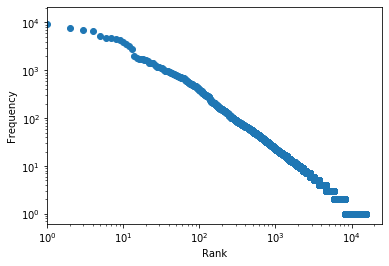

In [81]:
rank_list = []
freq_list = []
for i in range(len(word_count)):
    rank_list.append(i)
    freq_list.append(word_count[i][1])
    
f,ax = plt.subplots()
ax.scatter(rank_list,freq_list)
ax.set_xlabel("Rank")
ax.set_ylabel("Frequency")
ax.set_xscale("Log")
ax.set_yscale("Log")
ax.set_xlim(1,215000)

In [118]:
word_count

[('the', 3968865),
 ('and', 3682783),
 ('i', 3446839),
 ('to', 3231589),
 ('you', 2937717),
 ('a', 2555924),
 ('that', 2345755),
 ('like', 2148273),
 ('of', 2092190),
 ('it', 1666604),
 ('in', 1380717),
 ('is', 1332016),
 ('so', 1324378),
 ('know', 1112299),
 ('was', 1095804),
 ('but', 938039),
 ('this', 934061),
 ('just', 907295),
 ("it's", 896313),
 ('for', 885217),
 ('yeah', 835645),
 ('we', 831461),
 ('on', 826898),
 ('have', 749906),
 ('be', 704254),
 ('what', 666551),
 ('with', 661634),
 ('they', 634583),
 ('not', 622870),
 ('my', 614517),
 ("i'm", 609891),
 ('do', 571564),
 ('think', 564854),
 ("that's", 542188),
 ('he', 533314),
 ('your', 530638),
 ('because', 530637),
 ('are', 524771),
 ('if', 523792),
 ('about', 515327),
 ("don't", 513370),
 ('all', 511223),
 ('going', 490146),
 ('or', 486567),
 ('me', 473771),
 ('at', 469313),
 ('as', 451974),
 ('really', 437840),
 ('one', 422382),
 ('can', 419135),
 ('out', 409512),
 ('get', 406717),
 ('right', 392256),
 ('there', 372292),


# MLE

In [83]:
import numpy as np
from scipy.optimize import minimize
from scipy.special import zeta
import mpmath as mpm

def wfd_lin(x):
    '''In: x...list with floats representing data...size of all the words
       Out: k, P(k)...how many words with length k
            array is only constructed for those k-values for which Pk > 0!!!
    '''
    x.sort()
    k = []
    P_k = []
    count_temp = 0
    total = float(len(x))

    for i in np.arange(len(x)):
        if x[i] != count_temp:
            k += [float(x[i])]
            P_k += [float(1)]
            count_temp = x[i]
        else:
            P_k[-1] += 1.0
    P_k = np.array(P_k)/total
    return np.array(k),P_k
    
def wfd_histo(x):
    '''In: x...list with floats representing data...size of all the words
       Out: k, N(k)...how many words with length k
            array is only constructed for those k-values for which Pk > 0!!!
    '''
    x.sort()
    k = []
    N_k = []
    count_temp = 0
    N = float(len(x))
    i = 0
    while i < N:
        if x[i] != count_temp:
            k += [float(x[i])]
            N_k += [float(1)]
            count_temp = x[i]
        else:
            N_k[-1] += 1.0
        i += 1
    return np.array(k),np.array(N_k)

    
## zeta function
def zeta_minmax(gamma,kmin,kmax):
    '''kmax == None means kmax --> infty
    '''
#     gamma = gamma[0]
    if gamma <= 1.0:
        if kmax == None:
            print('ERROR: Series does not converge!!!')
            C = 0
        else:
            mpm.dps=25
#             print(gamma,kmin,kmax,'huhu')
            C = (float(mpm.sumem(lambda k: k**(-gamma),[kmin,kmax])))
    else:
        # print(kmax)
        # print(type(kmax))
        # print(kmax==None)
        # print('')
        if isinstance(kmax,(list,np.ndarray)):
            C = zeta(gamma,kmin)-zeta(gamma,kmax)
        elif kmax == None:
            C = zeta(gamma,kmin)
        else:
            C = zeta(gamma,kmin)-zeta(gamma,kmax)
        # print(C)
    return C
    
def zeta_minmax_cont(gamma,kmin,kmax):
    '''kmax == None means kmax --> infty
    '''
    if kmax==None:
        if gamma > 1.0:
            C = 1.0/(gamma-1)*(kmin**(1-gamma))
        else:
            C = -1#1.0/(gamma-1)*(kmin**(1-gamma) - kmax**(1-gamma))
            print('Error')
    else:
        C = 1.0/(gamma-1)*(kmin**(1-gamma) - kmax**(1-gamma))
    return C

## Leastsquares
def leastsquare(x,y):
    '''least square for y = a0 +a1*x
    '''
    a_0 = (sum(y)*sum(x*x) - sum(x)*sum(x*y))/(len(x)*sum(x*x) - (sum(x))**2.0)
    a_1 = (len(x)*sum(x*y) - sum(x)*sum(y))/(len(x)*sum(x*x) - (sum(x))**2.0)
    return a_0,a_1
    
## Filter functions
def filter_xy(x,y,xmin,xmax,ymin,ymax):
    '''filter where P(k) = 0 when bin in histogram still empty and y = P_k < kmin
    '''
    ind_del_ymin = np.where(y<ymin)[0]
    ind_del_ymax = np.where(y>ymax)[0]
    ind_del_y = np.append(ind_del_ymin,ind_del_ymax)
    
    if xmin != None:
        ind_del_xmin = np.where(x<xmin)[0]
    else:
        ind_del_xmin = []
    if xmax != None:
        ind_del_xmax = np.where(x>xmax)[0]
    else:
        ind_del_xmax = []
    ind_del_x = np.append(ind_del_xmin,ind_del_xmax)
    
    ind_del = np.append(ind_del_y,ind_del_x)
    x_f = np.delete(x,ind_del) 
    y_f = np.delete(y,ind_del)
    return x_f,y_f

def filter_x(x,xmin,xmax):
    '''filter where P(k) = 0 when bin in histogram still empty and y = P_k < kmin
       if xmin or xmax = None it means that it does not exist
    '''
    if xmin != None:
        ind_del_xmin = np.where(x<xmin)[0]
    else:
        ind_del_xmin = []
    if xmax != None:
        ind_del_xmax = np.where(x>xmax)[0]
    else:
        ind_del_xmax = []
    ind_del = np.append(ind_del_xmin,ind_del_xmax)
    
    x_f = np.delete(x,ind_del) 
    return x_f
    


## 2 powerlaws: pk = c*k**(-gamma1) if k<= km, c*km**(gamma2-gamm1)*k**(-gamma2) if k >= km
# faktor fuer k>=km ergibt sich durch anschlussbedingung

def pdf_2exp_disc(x,kmin,kmax,gamma1,gamma2,km):
    '''returns discrete power law with cutoff kmin,kmax...including kmax as last element
       therefore kmax+1 in argument. 
    '''
    if kmax == None:
        C = 1.0/(zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax) )
    else:
        C = 1.0/(zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax+1) )
    pk = C*((x<=km)*x**(-gamma1) + (x>km)*km**(gamma2-gamma1)*x**(-gamma2))
    return pk
    
def cdf_2exp_disc(x,kmin,kmax,gamma1,gamma2,km):
    '''returns discrete power law with cutoff kmin,kmax...including kmax as last element
       therefore kmax+1 in argument. 
    '''
    zeta_km = zeta_minmax(gamma1,kmin,km+1)
    if kmax == None:
        C = 1.0/(zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax) )
    else:
        C = 1.0/(zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax+1) )
    Fk = C*((x<=km)*zeta_minmax(gamma1,kmin,x+1) + (x>km)*(zeta_km + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,x+1)))
    return Fk


## fit 3 parameters, gamma1 as well
def mle_disc_minmax_optimize_2expzipf_3par(x,kmin,kmax,gamma1_0,gamma2_0,km_0,method = 'Nelder-Mead'):
    N = float(len(x)) #types
    M = float(sum(x)) #tokens
    x = np.sort(x)[::-1]
    rlog = np.log(np.arange(N)+1)
    
    D0 = sum((x/M)*rlog)
    # result = fmin(func_mle_disc_2expzipf_2par, [gamma2_0,km_0], args=(x,N,M,D0,kmin,kmax,gamma1),xtol=10**(-6),ftol=10**(-6),disp=0,full_output=1)
    result = minimize(
        func_mle_disc_2expzipf_3par, 
        [gamma1_0,gamma2_0,km_0], 
        args=(x,N,M,D0,kmin,kmax),
        # bounds = ((1.0,None),(1.,None)),
        options = {'disp':False},
        method=method)
    # convergence message 0...good,1...bad
    # warnflag = result[4]
    warnflag = result['success']
    if warnflag != True:
        print('No convergence in maximizing likelihood!')
    return result



## fit only 2 parameters
def mle_disc_minmax_optimize_2expzipf_2par(x,kmin,kmax,gamma1,gamma2_0,km_0,method = 'Nelder-Mead'):
    N = float(len(x)) #types
    M = float(sum(x)) #tokens
    x = np.sort(x)[::-1]
    rlog = np.log(np.arange(N)+1)
    
    D0 = sum((x/M)*rlog)
    # result = fmin(func_mle_disc_2expzipf_2par, [gamma2_0,km_0], args=(x,N,M,D0,kmin,kmax,gamma1),xtol=10**(-6),ftol=10**(-6),disp=0,full_output=1)
    result = minimize(
        func_mle_disc_2expzipf_2par, 
        [gamma2_0,km_0], 
        args=(x,N,M,D0,kmin,kmax,gamma1),
        # bounds = ((1.0,None),(1.,None)),
        options = {'disp':False},
        method=method)
    # convergence message 0...good,1...bad
    # warnflag = result[4]
    warnflag = result['success']
    if warnflag != True:
        print('No convergence in maximizing likelihood!')
    return result

def func_mle_disc_2expzipf_2par(params,x,N,M,D0,kmin,kmax,gamma1):
    gamma2 = params[0]
    if kmax==None:
        eps=10.0**(-6)
        if gamma2 <= 1.:
            gamma2=1. + eps
    km = int(np.abs(params[1]))
    # print(gamma2,km,gamma1,N)
    if kmax == None:
        C = zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax) 
    else:
#         print(zeta_minmax(gamma1,kmin,km+1))
#         print(zeta_minmax(gamma2,km+1,kmax+1))
        C = zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax+1)
    if km > N:
        summe1 = sum((x/M)*np.log(np.arange(N)+1))
    else:
#         print(km)
        summe1 = sum((x[:int(km)]/M)*np.log(np.arange(int(km))+1))
    summe2 = D0 - summe1
    summe3 = sum((x[int(km)+1:]/M))
    L = np.log(C) + gamma1*summe1 + gamma2*summe2 - summe3*(gamma2-gamma1)*np.log(km)
    return L

def func_mle_disc_2expzipf_3par(params,x,N,M,D0,kmin,kmax):
    gamma1 = params[0]
    gamma2 = params[1]
    if kmax==None:
        eps=10.0**(-6)
        if gamma2 <= 1.:
            gamma2=1. + eps
    km = int(np.abs(params[2]))
    # print(gamma2,km,gamma1,N)
    if kmax == None:
        C = zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax) 
    else:
#         print(zeta_minmax(gamma1,kmin,km+1))
#         print(zeta_minmax(gamma2,km+1,kmax+1))
        C = zeta_minmax(gamma1,kmin,km+1) + km**(gamma2-gamma1)*zeta_minmax(gamma2,km+1,kmax+1)
    if km > N:
        summe1 = sum((x/M)*np.log(np.arange(N)+1))
    else:
#         print(km)
        summe1 = sum((x[:int(km)]/M)*np.log(np.arange(int(km))+1))
    summe2 = D0 - summe1
    summe3 = sum((x[int(km)+1:]/M))
    L = np.log(C) + gamma1*summe1 + gamma2*summe2 - summe3*(gamma2-gamma1)*np.log(km)
    return L

In [84]:
def fit_double_powerlaw(counts,nrep,rmin_fit,rmax_fit):
    '''Fits the double power-law model'''
    gamma1 = 1.0 # gamma1 is fixed
    L = np.inf # normalized negative log-likelihood
    gamma2 = -1
    rm = -1
    # range to sample initial conditions for the free parameters
    x1_0 = (1.,3.)
    x2_0 = (1.,10**4)
    n_success = 0
    np.random.seed(41)
    for i_nrep in range(nrep):

        gamma2_0 =  np.random.random()*( x1_0[1]-x1_0[0]  ) + x1_0[0] 
        rm_0 = int(  np.random.random()*( x2_0[1]-x2_0[0]  ) + x2_0[0] )
    #     print(gamma2_0,rm_0)
        result = mle_disc_minmax_optimize_2expzipf_3par(counts,rmin_fit,rmax_fit,gamma1,gamma2_0,rm_0)

        gamma1_tmp, gamma2_tmp,rm_tmp = result['x']
        L_tmp = result['fun']
        warnflag = result['success']
        if warnflag==True:
            n_success+=1
        if L_tmp<L and warnflag==True:
            L=L_tmp
            gamma1 = gamma1_tmp
            gamma2 = gamma2_tmp
            rm = rm_tmp
    return([gamma1, gamma2,rm],L,n_success)

# Fitting Double Power Law

In [85]:
nrep=20
rmin_Fit=1
rmax_Fit=None
counts = freq_list
Result = fit_double_powerlaw(counts, nrep, rmin_Fit, rmax_Fit)
print(Result)

([0.9837139545346791, 2.369909618532549, 3243.981453305426], 6.5978834498863055, 20)


In [86]:
Result[0][0]

0.9837139545346791

# Simulate Data

In [87]:
def produce_simulated_data(Gamma1, Gamma2, Knee, Number_of_data_points):
    data_points = []
    rank = []
    for i in range(1,Number_of_data_points):
        if i <= Knee:
            x = i**-Gamma1
        else:
            x = Knee**(Gamma2-Gamma1) * i**-Gamma2
        
        data_points.append(x)
        rank.append(i)
    
    return data_points, rank

In [88]:
Gamma1 = Result[0][0]
Gamma2 = Result[0][1]
Knee = Result[0][2]
Number_of_data_points = len(freq_list)

sim_freqs, sim_ranks = produce_simulated_data(Gamma1, Gamma2, Knee, Number_of_data_points)

# Normalise Datasets for Comparison 

- put frequencies in the 0 to 1 range

In [89]:
def normalisation(LIST):
    normed_list = np.array(LIST) / sum(LIST)
    return normed_list

In [90]:
freq_list_normed = normalisation(freq_list)
sim_freqs_normed = normalisation(sim_freqs)

In [91]:
len(freq_list)

15630

# Plot the Double Power Law Fit against Data

Text(0.5, 1.0, "Zipf's Law in the TEDLIUM corpus")

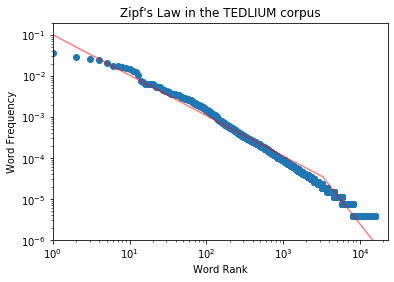

In [92]:
f,ax = plt.subplots()
ax.scatter(rank_list, freq_list_normed, label = "data")
ax.plot(sim_ranks, sim_freqs_normed, label = "fit", color='red', alpha=0.5)
ax.set_xlabel('Word Rank')
ax.set_ylabel('Word Frequency')
ax.set_xscale("log")
ax.set_xlim(1,23000)
ax.set_ylim(0.000001,0.2)
ax.set_yscale("log")
ax.set_title("Zipf's Law in the TEDLIUM corpus")

In [93]:
Document_Size = sum(freq_list)
Vocab = len(freq_list)
print("Doc Size:", Document_Size)
print("Vocab:", Vocab)

Doc Size: 265000
Vocab: 15630


In [94]:
word_count

[('the', 13383),
 ('and', 9436),
 ('to', 7557),
 ('of', 6891),
 ('a', 6538),
 ('that', 5330),
 ('in', 4673),
 ('i', 4659),
 ('is', 4492),
 ('you', 4229),
 ('we', 3862),
 ('this', 3570),
 ('it', 3222),
 ('so', 2830),
 ('was', 1964),
 ('have', 1837),
 ('are', 1716),
 ('they', 1716),
 ('for', 1694),
 ('what', 1663),
 ('but', 1663),
 ('on', 1582),
 ('with', 1427),
 ('one', 1415),
 ("it's", 1391),
 ('about', 1390),
 ('can', 1286),
 ('as', 1227),
 ('all', 1199),
 ('at', 1158),
 ('be', 1146),
 ('do', 1145),
 ('not', 1093),
 ('if', 1058),
 ('now', 1015),
 ('there', 977),
 ('from', 964),
 ('like', 963),
 ('my', 961),
 ('people', 958),
 ('these', 926),
 ('he', 924),
 ('know', 895),
 ('when', 892),
 ("'s", 889),
 ('just', 843),
 ('out', 834),
 ('very', 833),
 ('an', 793),
 ('here', 788),
 ('because', 781),
 ('see', 774),
 ('think', 769),
 ('our', 746),
 ('or', 726),
 ('how', 725),
 ('up', 721),
 ('me', 711),
 ('had', 704),
 ('going', 700),
 ('by', 698),
 ('which', 694),
 ('really', 691),
 ('then'

In [95]:
# The probability of seeing the word "The"
13318/265000

0.05025660377358491